Importing the essential modules


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [2]:
df = pd.read_csv("customer_churn_large_dataset.csv")

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


Checking for shape of the dataset

In [4]:
df.shape

(100000, 9)

Checking the unique values

In [5]:
df["Location"].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [6]:
df["Age"].unique()

array([63, 62, 24, 36, 46, 67, 30, 20, 53, 50, 44, 34, 28, 42, 55, 43, 31,
       41, 58, 64, 70, 18, 25, 27, 66, 29, 60, 26, 45, 19, 37, 49, 38, 57,
       47, 48, 40, 21, 33, 51, 35, 69, 61, 52, 39, 56, 59, 65, 22, 54, 68,
       32, 23], dtype=int64)

In [7]:
df["Subscription_Length_Months"].unique()

array([17,  1,  5,  3, 19, 15, 10, 12, 20, 13,  8, 23,  2,  4, 18,  9, 14,
       16,  6,  7, 24, 22, 11, 21], dtype=int64)

In [8]:
df["Monthly_Bill"].unique()

array([73.36, 48.76, 85.47, ..., 75.21, 41.98, 83.55])

In [9]:
df["Total_Usage_GB"].unique()

array([236, 172, 460, 297, 266, 456, 269, 396, 150, 383, 442, 295, 148,
       239, 233, 231, 198, 354, 429, 243, 270, 389, 226, 393,  89, 183,
       135, 185, 151, 115, 194, 278, 423, 202, 495, 162, 101, 294, 122,
       305, 212, 220, 253, 411, 447, 218, 221, 166,  64,  67, 391, 232,
       298, 334, 326, 459, 371, 299, 376, 214, 329,  50, 444, 113,  76,
       134, 184, 319, 235,  85, 332,  73, 369, 308, 446, 321,  83, 114,
       296, 102, 215, 169, 225, 140,  84, 463, 402, 468, 375, 366, 404,
       471, 204, 320, 178, 149, 361, 304, 281, 177, 117, 137, 322, 427,
       403, 237, 439, 336, 344, 288, 257, 196, 365, 419, 111, 192, 244,
       287, 395, 213, 109, 286, 283, 230, 491, 274, 335, 462, 407, 126,
       199, 351, 261, 496, 480, 400, 303, 197, 181, 474, 348, 112, 457,
        54, 397, 100, 318, 242, 327, 476, 256, 241, 466, 438,  51, 165,
       120, 493,  59, 188, 339, 167, 301, 209, 311, 190, 345, 284, 390,
        72, 258, 358, 136, 280,  55, 309, 388,  52, 478, 401, 47

Checking for the Null Values

In [10]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Check the outliers from data

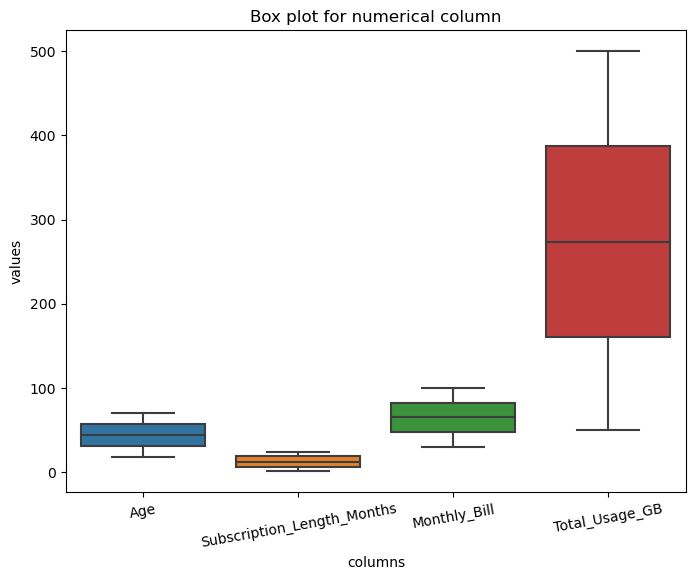

In [11]:
imp_to_see_outliers0 = ["Age","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB"]

plt.figure(figsize=(8,6))
sns.boxplot(data=df[imp_to_see_outliers0])
plt.title("Box plot for numerical column")
plt.xlabel("columns")
plt.ylabel("values")
plt.xticks(rotation=10)
plt.show()

Plot a heatmap


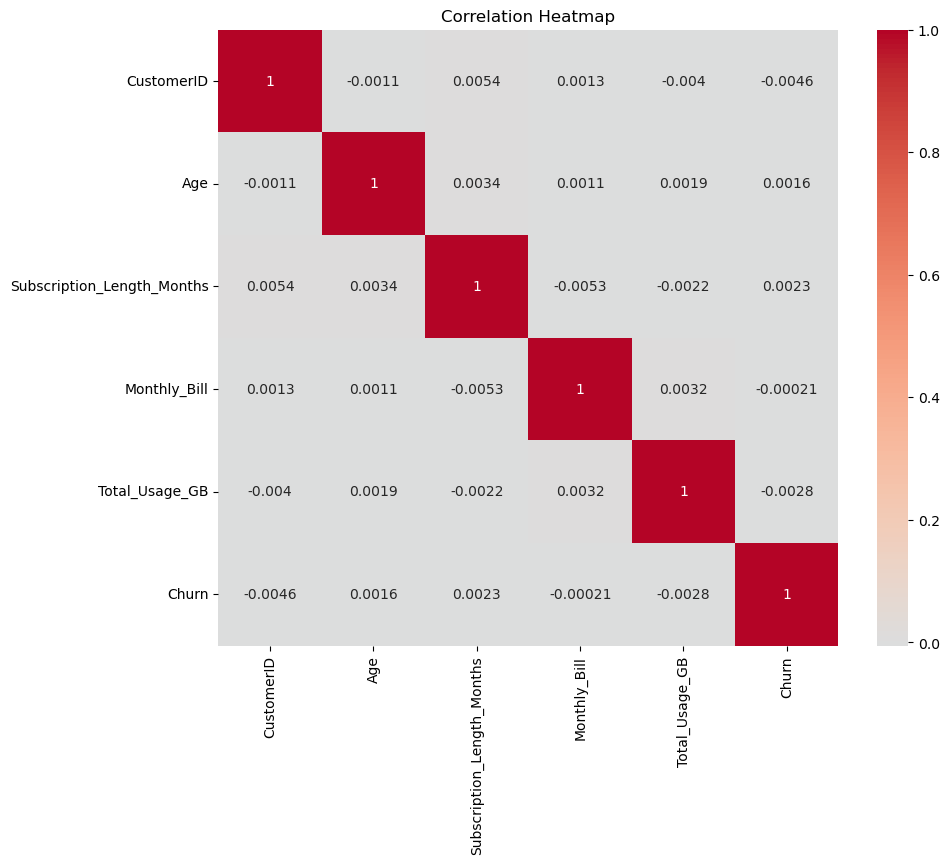

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

Plot count plot

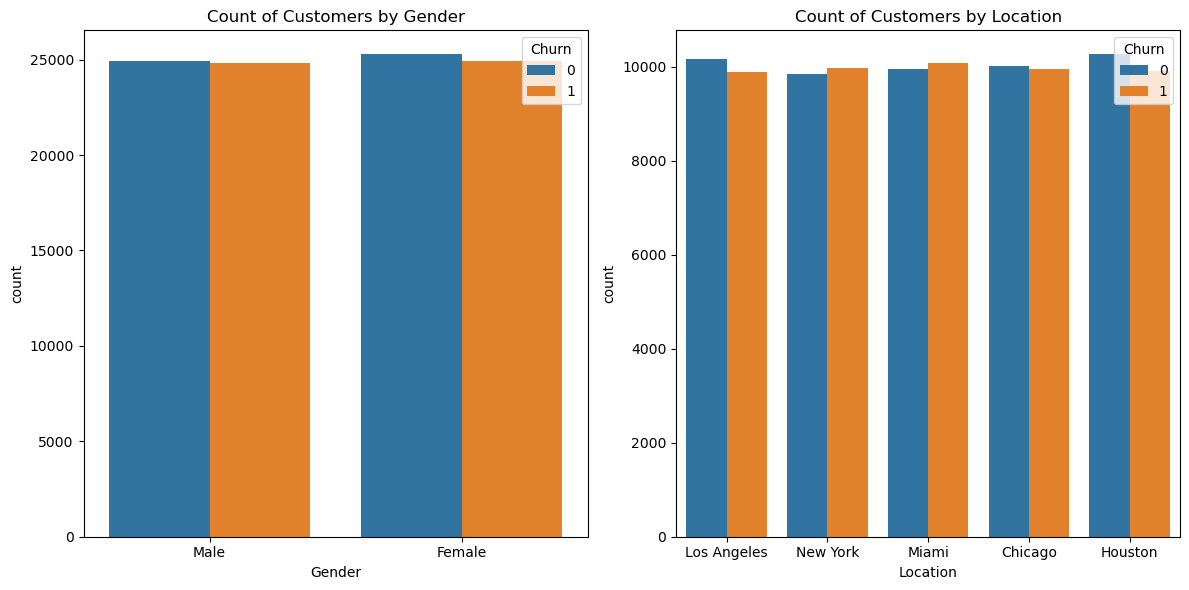

In [13]:
plt.figure(figsize=(12, 6))
for i,feature in enumerate(['Gender', 'Location']):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Count of Customers by {feature}')
    plt.tight_layout()

plt.show()


Preparing data for machine learning

In [14]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


Drop the uneccassry columns 

In [15]:
df1 = df.drop(["Name","CustomerID"],axis=1)

Convert string values to int

In [16]:
encoder = LabelEncoder()
df1["Gender"] = encoder.fit_transform(df1["Gender"])
df1["Location"] = encoder.fit_transform(df1["Location"])

In [17]:
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


Now the string values are changes to int 

In [18]:
print(df1["Gender"].unique())

print(df1["Location"].unique())

[1 0]
[2 4 3 0 1]


Spliting data into training and testing

In [19]:
x = df1.drop('Churn',axis=1)
y = df1['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Statistics summary of dataset

In [20]:
print(df1.describe())

                 Age         Gender       Location  \
count  100000.000000  100000.000000  100000.000000   
mean       44.027020       0.497840       1.995840   
std        15.280283       0.499998       1.411638   
min        18.000000       0.000000       0.000000   
25%        31.000000       0.000000       1.000000   
50%        44.000000       0.000000       2.000000   
75%        57.000000       1.000000       3.000000   
max        70.000000       1.000000       4.000000   

       Subscription_Length_Months   Monthly_Bill  Total_Usage_GB  \
count               100000.000000  100000.000000   100000.000000   
mean                    12.490100      65.053197      274.393650   
std                      6.926461      20.230696      130.463063   
min                      1.000000      30.000000       50.000000   
25%                      6.000000      47.540000      161.000000   
50%                     12.000000      65.010000      274.000000   
75%                     19.000000    

Check for the bias in the training data and testing data

In [21]:
train_pct = (len(x_train)/len(df1)) * 100
test_pct = (len(x_test)/len(df1)) * 100
print("length of training data : ", train_pct)
print("length of testing data : ", test_pct)

length of training data :  80.0
length of testing data :  20.0


Feature Engineering (feature scaling)

In [22]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

Create the object of the model

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train_scaled, y_train)

LogisticRegression()

Predict

In [25]:
y_pred = model.predict(x_test_scaled)

Model Evaluation

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.50225
Precision: 0.4977596204533474
Recall: 0.38070758996068943
F1-score: 0.4314352618653264


Fine Tune the model

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print("Tuned Model Accuracy:", tuned_accuracy)


Tuned Model Accuracy: 0.5033


Deployment of the model

In [29]:
age = float(input("Enter customer's age: "))
gender_str = input("Enter gender (Female or Male): ")
location_str = input("Enter location: ")
subscription_length = float(input("Enter subscription length in months: "))
monthly_bill = float(input("Enter monthly bill amount: "))
total_usage = float(input("Enter total usage in GB: "))

gender_encoded = encoder.fit_transform([gender_str])[0]
location_encoded = encoder.fit_transform([location_str])[0]

new_customer_data = np.array([[age, gender_encoded, location_encoded, subscription_length, monthly_bill, total_usage]])

new_customer_data_scaled = scalar.transform(new_customer_data)

new_customer_churn_prediction = best_model.predict(new_customer_data_scaled)

if new_customer_churn_prediction[0] == 0:
    churn_status = "Not Churned"
else:
    churn_status = "Churned"

print("New Customer Churn Prediction:", churn_status)


Enter customer's age: 25
Enter gender (Female or Male): male
Enter location: new uork
Enter subscription length in months: 255
Enter monthly bill amount: 230
Enter total usage in GB: 122
New Customer Churn Prediction: Not Churned
